# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 11 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Poorna Chandrika Maddisetty </font>

# I. Introduction

The objective of this assignment is to apply the four classification algorithms that includes Pocket Algorithm, Linear Discriminant Analysis, Quadratic Discriminant Analysis, Logistic Regression 

The following are the steps that will be followed 
- Identify the features that are necessary to classify the data.
- Identify the number of classes.
- Implement the algorithms, apply on the dataset and compute the performance metrics for each of the algorithm.
- Compare the algorithms and choose the best algorithm that fits the data

# II. Data

<br> The dataset I have chosen is the Default of credit card clients. The dataset is mainly aimed at the default payment of customers in Taiwan. The estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.
<br>

This data set contains 23 columns and a default payment binary resposne variable to be predicted.There are columns that represents the demographics of the customer like gender, marriage, education and age. The data set also provides the information about the customer's previous payments, bill amounts and payment due's that helps in predicting the default payment. The columns PAY_0, PAY_2, PAY_3, PAY_4,  PAY_5, PAY_6 represents the history of past payments where PAY_0=the repayment status in September,...and PAY_6=the repayment status in April with the values ranging as  -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above respectively. The columns BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 represents the amount of bill statement in dollars. The columns PAY_AMT1,PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 represnts the amount of previous payments in dollars from Septemper to April <br><br>


# SOURCE OF DATA

I gathered this dataset from the UCI respository

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# READING THE DATA

As my dataset contains only numeric data I have the flexibility to use either numpy or the pandas and I am using the pandas library to read the data set and matplot lib and seaborn to visually represent the data and relationships between them. As my data contains two headers I am dropping one header to effectively represent the data and increase the readability

In [906]:
import numpy as np
from copy import deepcopy as copy 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [907]:
df = pd.read_excel("default of credit card clients.xls", header=[0, 1])
df.columns=df.columns.droplevel(-2)
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# PREPROCESSING OF THE DATA

<br>As illustrated above, cleaning the data, handling the null values and handling the strings are the basic steps to perform and make the data ready for the machine learning algorithm. Null values in the data can be checked using the numpy library.<br><br>

In [908]:
np.any(df.isnull())

False

# VISUALIZATION OF THE DATA

<br>As my data do not contain any null values, and any categorical values my pre processing step was easier. To visualise the data I am using bar graphs, scatterplots, violinplots, catplots, countplot and pairplot to represent the relationship between the attributes <br><br>

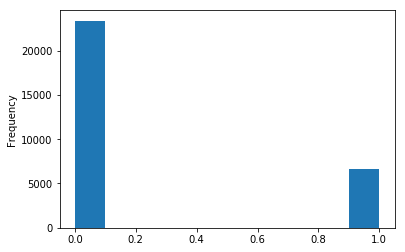

In [909]:
T= df.loc[:, 'default payment next month'].copy()
T
T.plot.hist()

In [910]:
X = df.iloc[:, :-1].copy()
X.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


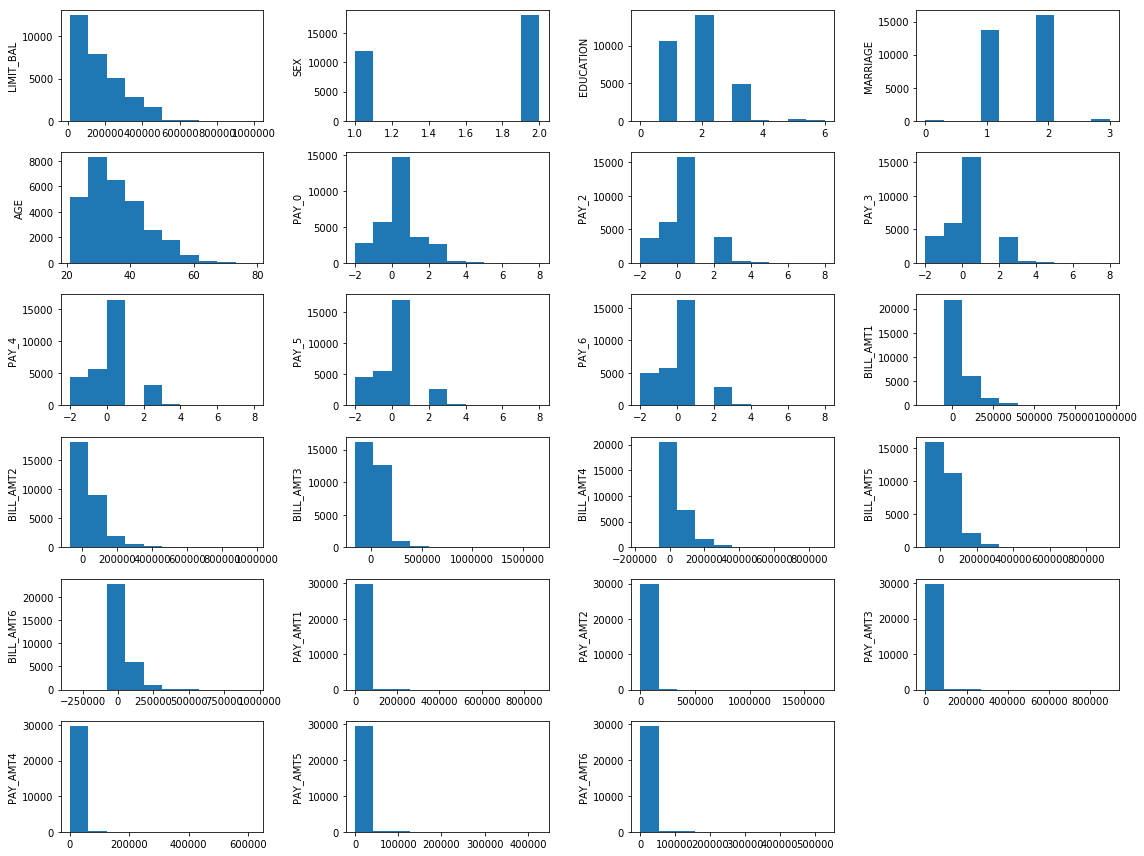

In [911]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(23):
    plt.subplot(6, 4, i+1)
    plt.hist(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

In [912]:
df2=copy(df)

In [913]:
#df['Y'] = df['Y'].astype(object)
df2['default payment next month']=df2['default payment next month'].replace({0:'No', 1:'Yes'})
#df['SEX'] = df['SEX'].astype(object)
df2.SEX=df2.SEX.replace({1:'Male', 2:'Female'})
df2.MARRIAGE=df2.MARRIAGE.replace({1:'Married', 2:'Single', 3:'Others',0:'Unknown' })
df2.EDUCATION=df2.EDUCATION.replace({1:'Graduate', 2 :'university', 3:'high school' ,4:'others'})

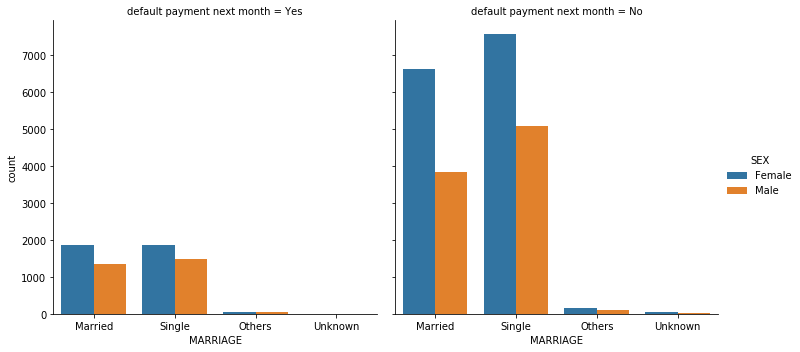

In [914]:
sb.catplot(x="MARRIAGE", hue="SEX", col="default payment next month", data=df2,kind="count" )

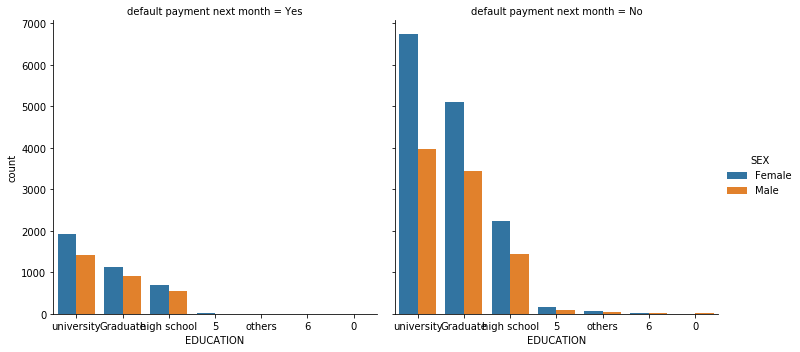

In [915]:
sb.catplot(x="EDUCATION", hue="SEX", col="default payment next month", data=df2,kind="count" )

In [916]:
bins = [0, 1, 5, 10, 20, 35, 50, 100]
df2['Agebins'] = pd.cut(df2['AGE'], bins)

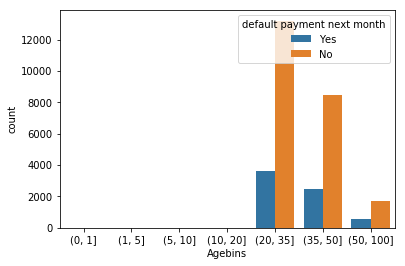

In [917]:
sb.countplot(x="Agebins", hue="default payment next month", data=df2)

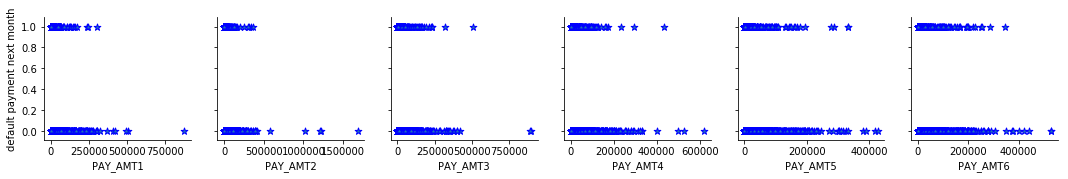

In [918]:
sb.pairplot(df, x_vars=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"], y_vars=["default payment next month"], markers="*",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

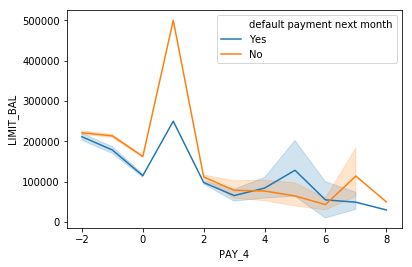

In [919]:
sb.lineplot(x="PAY_4", y="LIMIT_BAL", data=df2, hue="default payment next month")

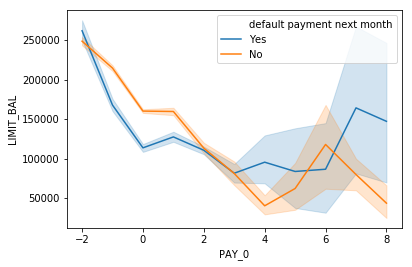

In [896]:
sb.lineplot(x="PAY_0", y="LIMIT_BAL", data=df2, hue="default payment next month")

# PERLIMINARY OBSERVATION

<br> Based on the data illustarted above I noticed the following observations.
1. The total number of default payments on the whole data sets are less and this can viewed on the histogram plotted above
2. The basic demographics on the whole dataset can is visible in the subplots plotted as histograms, which indicates very primary information such as the more number of female and less number of male customers, and the count of customers based on their marital status and education.
3. The scatter graph plotted illustrates that as the balance limit is increasing the default payment was not the option.
4. The Bill amounts had a directly proportional relationship to the default payment which can be noticed in the scatter plots.
5. Catplots are plotted for the demographics marriage anad education labelling them on the x-axis and distinguishing them on the gender for the default payments.
6. It indicates that the default payment was considered by both of the married and single female poulation in the data set
7. Also the university female population has the higher proportion of considering the default payment
8. The countplot plotted with agebins indicate that customers within the age group of 20-35 are more likely to use the default payment
9. The pair plots for the payment amount is representing that from April to September as the amount is increasing there is less likely chance of customer using default payment next month.
10. The bill amount did not seem to have any effect on the default payment
11. The payment history of the customers plotted with the line graph tells us that with the increrasing amount the payment due was maintained correctly and there less chance for the default payment

# III. Method

The class BaseModel is the super class and has two abstract methods train annd use. These abstarct methods are implemented 

The classifier is the super class for all the classification models and it has the following functions defined in it.

1)init: This function is used for the initialization purpose

2)normalize: This function is used to normalise an array. The data is normalised by substracting its mean and dividing it by the standard deviation

3)check_matrix: This function is used to check if we have recieved a proper format of matrix or not.

4)add_ones:This function is used for adding bias to the array

The methods in this Base Model are implemented in the classifier class.

# Summary of Classification models

#### Pocket Algorithm:
Pocket Algorithm is a variant of Perceptron Algorithm.It can solve binary linear classification problems.In this algorithm the weights are computed using the gradient descent alpha and the final output is based on this weights. Like every linear model the resultof this classification model is the dot product of x and w. Weights will be updated in every iteration and  weights updated during last iteration will be final weights can be used for prediction

Tp be effecient we iterate over the algorithm for few times to predict the weights of the features. The more the number of iterations, the predictions will be accurate.After the weights are recieved we use a sign function to check the sign of the data recieved and assign it to appropriate class

w(k+1)=w(k)+α(ti)(xi) , α is our learning rate

#### Discriminant Analysis:

Discriminant analysis takes the base of gaussian distribution.It can be used to model the distribution of each class using bayes theorem. This is the final equation obtained after we use the Gaussian distribution model 

$$
P(T = k \mid x) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k)} P(T = k)} { P(x) }.
$$

#### Quadratic Discriminant Analysis:

This is a type of Bayesian classifiers. With respect to each possible output class(Y) r from 1, 2, ..., k, the classifier computes Pr(Y = r | X = x) – which is the probability that the actual output is r, given x as the input.

QDA computes a different covariance for each class.The decision boundary is placed where the discriminant functions meet such as δ1==δ2. Since the δk function is quadratic in x, the decision boundary is quadratic. We call this approach as Quadratic Discriminant Analysis (QDA).

$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

for a new sample x model can predict the label with
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

#### Linear Discriminant Analysis:
Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique, and also as Linear Classifier. As the computation of covariance is costly by unifying the covariance matrix, we can remove the quadratic term in our disciriminant function.Using the same covariance for all the classes, we can reach the linear discriminant analysis model In many cases, for simple computation, the covariance matrix Σ is chosen as an average of all the covariance matrices for all classes. The discriminant function can be written as

$$
\delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

for a new sample x model can predict the label with
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

In general, LDA does learn a linear boundary between the points belonging to different classes. QDA, on the other hand, learns a quadratic one. If the actual boundaries are linear in such case QDA may have a higher model bias.

Another scenario to illustrate is whe we have limited set of training points and if we try to divide the already sparse dataset into the constituent classes, the covariance matrix computed might be extremely inaccurate. In this case it is better to simplify the entire process and use a common covariance matrix.

#### Logistic Regression:

When dealing with multiple classes, it can cause masking problem that one class estimation is masked by other predictions. So we consider a linear regression model that directly predicts P(T=k∣x), not the class label k and call this approach as Logistic Regression. Tthis is very similar to the linear reggression model and this produces the output with two probabilities. We can check the probabilities of the recieved data and assign it to the class to which it shows the higher probability

$$
wv \leftarrow wv + \alpha Xm^\top \Big(  Tm - g(Xm)\Big).
$$

### A. Super Classs Definition

In [920]:
import numpy as np
import abc
from abc import ABC, abstractmethod


# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self):
        self.meanX = None
        self.stdX = None
        self.w = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [921]:
from copy import deepcopy as copy 

class Pocket(Classifier):
    def __init__(self, alpha, maxiter):
        Classifier.__init__(self)
        self.alpha = alpha
        self.maxiter = maxiter
        self.w_pocket=None
        
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
        
    #train the data set
    def train(self, X, T):
        self._check_matrix(X, 'X')
        
        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))
        T = self.normalize(T)
        self.w =np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)
            
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
            if converged:
                break
             
        
    def use(self, X):
        Xs = self.add_ones(self.normalize(X))
        return np.sign(Xs @ self.w_pocket)

# Explanation of Codes

As the Pocket class extends the Base class it implements the two methods train and use. As the name implies the train function is used for training the algorithm using the gradient descent. The compare function is used as a part of train method to check the weights.

The train function takes x and T as input where X is the feature matrix, T is the target matrix. The weights are intialized to zero and W_pocket has the copy of it.maxiter is the variable that is used ti specify the number of times algorithm should iterate. In each iteration the weight w is updated and they are checked using the compare function. If the current weights are better than the w_pocket the current values are updated in the W_pocket

In the use function like other linear models we compute the dot product of x and w

### C. QDA

In [922]:
class Quad(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.mu2=None
        self.Sigma1=None
        self.Sigma2=None
        self.prior1=None
        self.prior2=None
        self.d1=None
        self.d2=None
        
    def QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = (X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv.T, axis=1) + np.log(prior)

    def train(self,X,T):
        ad_df = pd.DataFrame(X, index=X.index, columns=X.columns)
        ad_df['default']=T
        X1=ad_df[ad_df.default == -1.0]
        X1=X1.drop(['default'],axis=1)
        X2=ad_df[ad_df.default == 1.0]
        X2=X2.drop(['default'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)

        self.Sigma1 = np.cov(X1.T)
        print(self.Sigma1.shape)
        self.Sigma2 = np.cov(X2.T)

        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.prior1 = N1 / (N1+N2)
        self.prior2 = N2 / (N1+N2)
        
    def use(self, X):
        Xs = self.normalize(X)
        self.d1 = self.QDA(Xs,np.matrix(self.mu1),self.Sigma1,self.prior1)
        self.d2 = self.QDA(Xs,np.matrix(self.mu2),self.Sigma2,self.prior2)
        return self.d1,self.d2

# Explanation of Code

QDA algorithm also uses the base class CLassifier that has two abstract methods train and use. In addition to those methods we have one more method called QDA, that computes the discriminant for the data we send.

The train function has two input variables X and T, here X is the feature matrix and T is the target data. In the train method we classify the data according to the classes i.e using +1 and -1 as labels for the data. Based on the two classifiers we calcluate mu1, mu2, sigma1,sigma2 and the probalities prior1 and prior2.

The use function takes the test data as input and calls the QDA method that computes the discriminans for the data.Based on the discriminant we assign the class that has the highest discriminant

### D. LDA

In [923]:
class Linear(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma=None
        self.prior1=None
        self.mu2=None
        
        self.prior2=None
        self.d1=None
        self.d2=None
        
    @staticmethod   
    def LDA(X, mu, sigma, prior):
        
        
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu.T - 0.5 * np.dot(mu, sigma_inv) * mu.T + np.log(prior), axis=1)
    
    
    def train(self,X, T):
        
        sn=self.normalize(X)
        print(sn.shape)
        ad_df = pd.DataFrame(sn, index=X.index, columns=X.columns)
        ad_df['default']=T
        X1=ad_df[ad_df.default == -1.0]
        X1=X1.drop(['default'],axis=1)
        X2=ad_df[ad_df.default == 1.0]
        X2=X2.drop(['default'],axis=1)
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma = np.cov(sn.T)
        print(self.Sigma.shape)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.prior1 = N1 / (N1+N2)
        self.prior2 = N2 / (N1+N2)
        
    def use(self, X):
        Xs = self.normalize(X)
        self.d1 = self.LDA(Xs,np.matrix(self.mu1),self.Sigma,self.prior1)
        self.d2 = self.LDA(Xs,np.matrix(self.mu2),self.Sigma,self.prior2)
        return self.d1,self.d2
        
        
    

# Explanation of Code

LDA algorithm is very similar to the QDA algorithm. This algorithm also uses the base class classifier and has to implement the methods train and use. It also contains a method called LDA that computes the discriminant.

The train method takes the X and T as the input and once the feature matrix is recieved we divide the data to classes -1 and 1 and we get two classifiers for the data. For the two classifiers we compute the mu1, mu2, prior1, prior2 and only one covariance is calculated for the whole data.

The use method takes X as input and makes call to the LDA function, similar to the QDA based on the highest discriminant value we assign that particular class label


### E. Logistic Regression

In [924]:
class LogisticRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha,niter):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
        self.niter = niter
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)    
        K = len(np.unique(T))
        N = X.shape[0]
        D = X.shape[1]
        self.w = np.zeros((D+1, K))
        X = self.add_ones(X)
        T = np.array(T)
        
        test_df= pd.DataFrame(T)
        one_hot2=pd.get_dummies(test_df[0])
        test_df=test_df.drop(0,axis=1)
        test_df=test_df.join(one_hot2)
        
        T =np.array(test_df)
        
        print(T)
        for step in range(self.niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

# Explanation of Code

This algorithm is also the child class of the Classifier class and has to implement the train and use methods. In addition to that it also has two other methods called softmax and g(). The softmax function generalizes the sigmoid function.

The train function takes the input X and T. Based on the unique values values in T it computes the K value, i.e the number of classes in T. The w matrix is them initialised with zeros and it has dimensions of (D+1)*K. T matrix is one hot encoded and the classes are seperated. niter is the number of iterations that we use to train the data. For each iteration the matrix weight is updated and calculated. We also add bias to X to make it match the w dimensions for performing the operations.

The use function takes the test data X as input and it them computes the dot product using the softmax function on X and weights

# IV. Experiments

## Partitioning the data in to train and test

I am using sklearn package to split the data in to train and test where 30% of my data is randomly sampled to test and the rest is marked as train. As I would be dealing with the sign function and comparisons in all of the algorithms it would be better and more edible if I transform my data to positives and negatives. In Pocket algorithm I am using a binary classification technique to classify the data accordingly.

In [1053]:
df = pd.read_excel("default of credit card clients.xls", header=[0, 1])
df.columns=df.columns.droplevel(-2)
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [1054]:
df['default payment next month'] = df['default payment next month'].replace({0: -1, 1: 1})

In [1055]:
T = df.loc[:, 'default payment next month'].copy()
X = df.iloc[:, :-1].copy()


In [1056]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

print(X_tr.shape)

print(X_test.shape)

print(T_tr.shape)
print(T_test.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [1057]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

#### Metrics
To compute the performance, I would be using the following metrics:

1. Confusion Matrix
2. Precision
3. Recall
4. Accuracy
5. Specificity

The below functions illustrate how to compute the following metrics

In [1058]:
def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [1059]:
def acc(cf):
    cf=np.array(cf)
    return (cf[1,1]+cf[0,0])/(cf[0,0]+cf[0,1]+cf[1,0]+cf[1,1])

def precision(cf):
    cf=np.array(cf)
    if cf[1, 1] + cf[1, 0] == 0 :
        return 0
    else:
        return cf[1, 1] / (cf[1, 1] + cf[1, 0])
    
def recall(cf):
    cf=np.array(cf)
    if cf[1, 1] + cf[0, 1] == 0 :
        return 0
    else:
        return cf[1,1]/(cf[1,1]+cf[0,1])
    
def specificity(cf):
    cf=np.array(cf)
    if cf[0, 0] + cf[1, 0] == 0 :
        return 
    else:
        return cf[0,0]/(cf[0,0]+cf[1,0])

# Pocket Algorithm

#### Training the Algorithm

I am trying to train my pocket algorithm using the alpha value as 0.01 and the giviing the max iterations as 5. As the large number of iterations is blocking the execution of my algorithm I am limiting the number of iterations on the dataset and giving the 70% of data as input to train my algorithm

In [1060]:
poc=Pocket(0.01,5)
poc.train(X_tr,T_tr)

#### Using the Algorithm

As I trained my algorithm, it is now ready to be tested with the features or X vaues. A call to the pocket.use method will be made by passing the test values of the feauture matrix. below details explain the metrics that are chosen to evaluate this classification technique

## Choice of Evaluation Metrics

To evaluate a machine learning model is critical for the choice of right tools and performance. There are several classification measurements to meet different needs for practical applications. In this section, we examine popular measures.

- **Confusion matrix**

Each row in this matrix represents the predictions from model and column represents the actual classes

  | - | + 
 --|--|--
 - | True Negative (TN) | False Positive (FP)
 + | False Negative (FN)| True Positive (TP)
 
 - **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

- **ROC AUC Score**

The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve. 


- **Accuracy**

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

- **F1 Score**

It provides the harmonic mean of precision and recall.

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

F1 score favors the similar precision and recall values. 



#### Accuracy on Train Data

As I trained my algorithm now I want to test the accuracy of my algorithm on the train data. To check that I can se either the function I implemented or the packages from the sklearn.I will compute the accuracy and F1 score on my train data. I am also computing the confusion matrix on the train data to give a view of the true positives, true negatives, false positives and false negatives respectively

In [1061]:
ypred_tr=poc.use(X_tr)

In [1062]:
from sklearn.metrics import confusion_matrix
cf1=confusion_matrix(T_tr, ypred_tr)
cf1

array([[ 6366, 10035],
       [  889,  3710]], dtype=int64)

In [1063]:
print('Accuracy value:', acc(cf1))
print('F1 score :', f1_score(T_tr, ypred_tr))

Accuracy value: 0.4798095238095238
F1 score : 0.4044919319668556


#### Accuracy on the test data

I now want to test the accuracy of my algorithm on the test data.I compute the metrics as deifned above but for the test data and the predicted target values for the test data.

##  Evaluation Metrics

As described above I am using the accuracy, f1 score, precision, recall, specificity to compute the performance of the algoithm. Based on these metrics I can conclude whether my algorithm classifies the elements properly

In [1064]:
 ypred=poc.use(X_test)

#### Confusion Matrix

In [1065]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(T_test, ypred)
cf

array([[2558, 4405],
       [ 369, 1668]], dtype=int64)

#### Accuracy & F1 score

In [1066]:
print('Accuracy value:', acc(cf))
print('F1 score :', f1_score(T_test, ypred))

Accuracy value: 0.46955555555555556
F1 score : 0.4113440197287299


#### Precision

In [1067]:
print('Precision:', precision(cf))

Precision: 0.8188512518409425


#### Recall

In [1068]:
print('Recall:', recall(cf))

Recall: 0.2746583237279763


#### Specificity

In [1069]:
print('Specificty:', specificity(cf))

Specificty: 0.8739323539460199


#### ROC AUC Score

In [1070]:
roc_auc_score(T_test, ypred)

0.5931108190843375

### Summary of Evaluation Metrics

Confusion Matrix = 	array([[2558,    4405],[369,    1668]], dtype=int64)

Accuracy : 0.46955

Precision : 0.818

Recall : 0.2746

Specificity : 0.8739

F1 Score : 0.4113



### Train and Test Accuracies

The train data has an accuracy of  0.4798

The test data has an accuracy of 0.46955

As the train and test data have similar accuracy this model is not overfitting

## Plots for the Pocket Algorithm Classification Results

Plotting the data for actual and predicted values using matplotlib

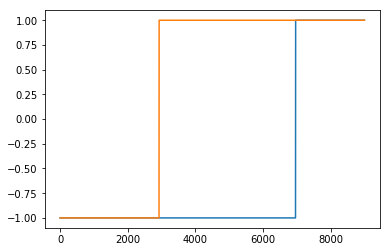

In [943]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.sort(T_test))
plt.plot(np.sort(ypred))

Text(0,0.5,'Y calculated')

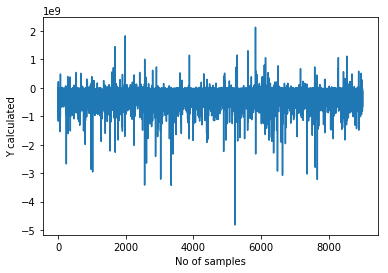

In [944]:
from copy import deepcopy as copy 
xnew = copy(X_test)
xnew = np.hstack((np.ones((xnew.shape[0], 1)), xnew))
plt.plot(xnew @ poc.w)
plt.xlabel("No of samples")
plt.ylabel("Y calculated")

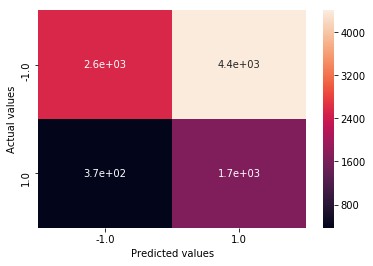

In [945]:
import seaborn as sb
ax= plt.subplot()
sb.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted values');
ax.set_ylabel('Actual values'); 


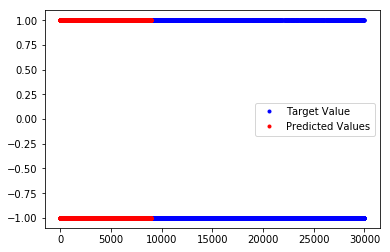

In [946]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T_test, '.', color='b', label='Target Value')
ax.plot(ypred, '.', color='r', label='Predicted Values')
target, predict = ax.get_legend_handles_labels()
ax.legend(target, predict)
plt.show()

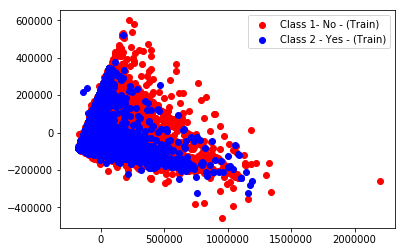

In [947]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_tr))
f = np.array(T_tr==-1)
t = np.array(T_tr==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - (Train)', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - (Train)', c='blue')
plt.legend()

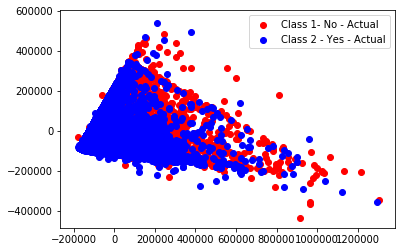

In [948]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(ypred==-1)
t = np.array(ypred==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Actual', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Actual', c='blue')
plt.legend()

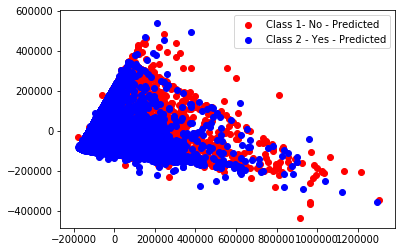

In [949]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(ypred==-1)
t = np.array(ypred==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Predicted', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Predicted', c='blue')
plt.legend()

I tried to establish a relation between two few prime features of the dataset and the predicted values of the classifier to show the dependency on the features.

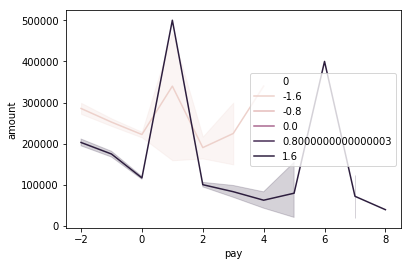

In [950]:
new_df = pd.DataFrame(ypred)
new_df['amount'] = X_test['LIMIT_BAL'].values
new_df['pay'] = X_test['PAY_2'].values
sb.lineplot(x="pay", y="amount", data=new_df, hue=0)

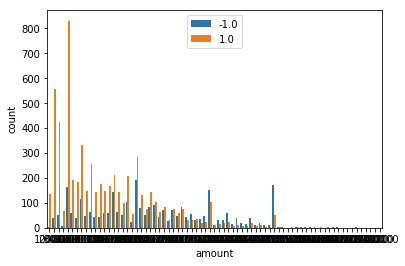

In [951]:
sb.countplot(x="amount", hue=0, data=new_df)

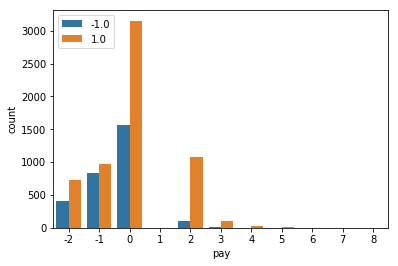

In [952]:
sb.countplot(x="pay" ,hue=0, data=new_df)

# QDA

#### Training the dataset

I have trained my data set using 70% of the data samples and calculate the mean, covariance and computed the sigma.

In [1071]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

In [1072]:
qda = Quad()
qda.train(X_tr,T_tr)

(23, 23)


#### Using the dataset

In [1073]:
d1, d2 = qda.use(X_test)
d1 = np.array(d1)
d2 = np.array(d2)
d3=np.zeros(len(d1))
for i in range(len(d1)):
    if d1[i]>d2[i]:
        d3[i]=-1
    else:
        d3[i]=1

#### Accuracy of train data

In [1074]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

In [1075]:
da, db = qda.use(X_tr)
da = np.array(da)
db = np.array(db)
dc=np.zeros(len(da))
for i in range(len(d1)):
    if da[i]>db[i]:
        dc[i]=-1
    else:
        dc[i]=1

In [1076]:
from sklearn.metrics import confusion_matrix
cfq0=confusion_matrix(T_tr, dc)
cfq0

array([[   3, 9440, 6958],
       [   0,    0,    0],
       [   1, 2560, 2038]], dtype=int64)

In [1077]:
print('Accuracy value - train:', acc(cfq0))

Accuracy value - train: 0.0003176956475696283


#### Accuracy of test data

#### Confusion Matrix

In [1078]:
from sklearn.metrics import confusion_matrix
cfq=confusion_matrix(T_test, d3)
cfq

array([[   1, 6962],
       [   0, 2037]], dtype=int64)

#### Accuracy & F1 score

In [1079]:
print('Accuracy value:', acc(cfq))
print('F1 score :', f1_score(T_test, d3))

Accuracy value: 0.22644444444444445
F1 score : 0.369155491119971


#### Precision

In [1080]:
print('Precision value:', precision(cfq))

Precision value: 1.0


#### Recall

In [1081]:
print('Recall value:', recall(cfq))

Recall value: 0.22635848427603067


#### Specificity

In [1082]:
print('Specificiy value:', specificity(cfq))

Specificiy value: 1.0


#### ROC AUC curve

In [1083]:
roc_auc_score(T_test, d3)

0.5000718081286801

### Summary of Evaluation Metrics

Confusion Matrix = 	array([[1,    6962],[0,    2037]], dtype=int64)

Accuracy : 0.2264

Precision : 1.0

Recall :  0.226

Specificity : 1.0

F1 Score : 0.369

### Train and Test data Accuracy

The train data accuracy is : 0.00031

The test data accuracy is : 0.226

As the train and test data does not have similar accuracy this model is overfitting

# Plots for the QDA Classification results

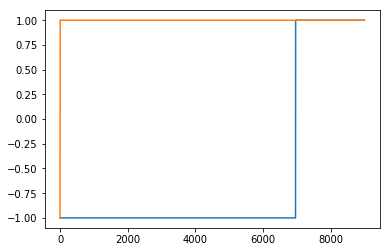

In [966]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.sort(T_test))
plt.plot(np.sort(d3))

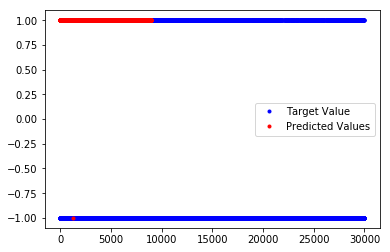

In [967]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T_test, '.', color='b', label='Target Value')
ax.plot(d3, '.', color='r', label='Predicted Values')
target, predict = ax.get_legend_handles_labels()
ax.legend(target, predict)
plt.show()

Text(0,0.5,'Y calculated')

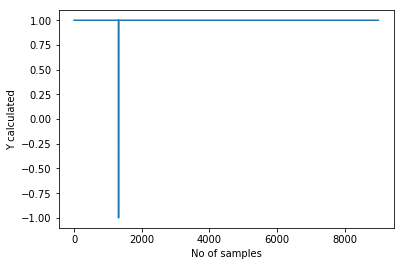

In [968]:
from copy import deepcopy as copy 
xnew = copy(X_test)
xnew = np.hstack((np.ones((xnew.shape[0], 1)), xnew))
plt.plot(d3)
plt.xlabel("No of samples")
plt.ylabel("Y calculated")

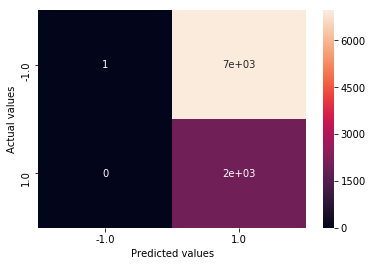

In [969]:
import seaborn as sb
ax= plt.subplot()
sb.heatmap(cfq, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted values');
ax.set_ylabel('Actual values'); 


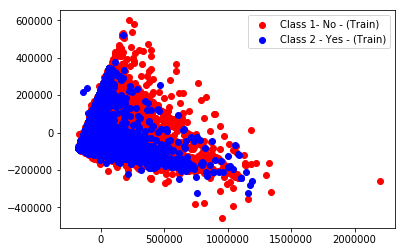

In [970]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_tr))
f = np.array(T_tr==-1)
t = np.array(T_tr==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - (Train)', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - (Train)', c='blue')
plt.legend()

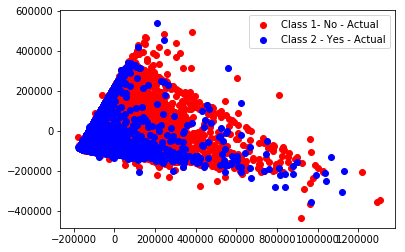

In [971]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(T_test==-1)
t = np.array(T_test==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Actual', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Actual', c='blue')
plt.legend()

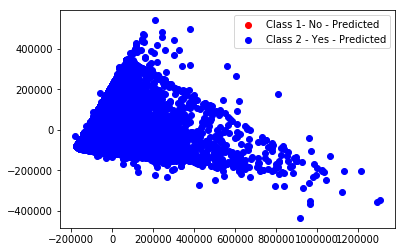

In [972]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(d3==-1)
t = np.array(d3==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Predicted', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Predicted', c='blue')
plt.legend()

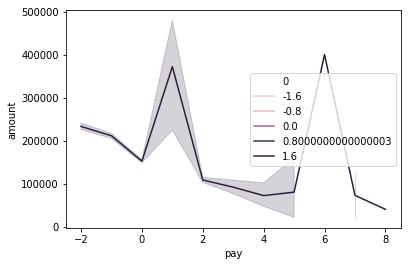

In [973]:
new_df = pd.DataFrame(d3)
new_df['amount'] = X_test['LIMIT_BAL'].values
new_df['pay'] = X_test['PAY_2'].values
sb.lineplot(x="pay", y="amount", data=new_df, hue=0)

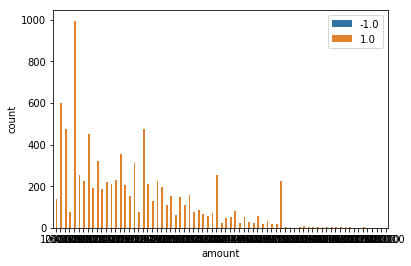

In [974]:
sb.countplot(x="amount", hue=0, data=new_df)

# LDA

#### Training the Algorithm

My LDA algorithm is very similar to QDA algorithm except for the sigma value. I am training my algorithm using 70% of the data

In [1084]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

In [1085]:
lda = Linear()
lda.train(X_tr, T_tr)

(21000, 23)
(23, 23)


#### Using the algorithm

In [1086]:
d4, d5 = lda.use(X_test)
d4 = np.array(d4)
d5 = np.array(d5)
d6=np.zeros(len(d4))
for i in range(len(d4)):
    if d4[i]>d5[i]:
        d6[i]=-1
    else:
        d6[i]=1

#### Accuracy of train data

In [1087]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

In [1088]:
dd, de = lda.use(X_tr)
dd = np.array(dd)
de = np.array(de)
df=np.zeros(len(dd))
for i in range(len(dd)):
    if dd[i]>dd[i]:
        de[i]=-1
    else:
        de[i]=1

In [1089]:
from sklearn.metrics import confusion_matrix
cfl0 =confusion_matrix(T_tr, de)
cfl0

array([[    0, 16401],
       [    0,  4599]], dtype=int64)

In [1090]:
print('Accuracy value:', acc(cfl0))
print('F1 score :', f1_score(T_tr, de))

Accuracy value: 0.219
F1 score : 0.3593109105824446


#### Accuracy of test data

#### Confusion Matrix

In [1091]:
from sklearn.metrics import confusion_matrix
cfl=confusion_matrix(T_test, d6)
cfl

array([[6828,  135],
       [1643,  394]], dtype=int64)

#### Accuracy & F1 score

In [1092]:
print('Accuracy value:', acc(cfl))
print('F1 score :', f1_score(T_test, d6))

Accuracy value: 0.8024444444444444
F1 score : 0.30709275136399067


#### Precision

In [1093]:
print('Precision value:', precision(cfl))

Precision value: 0.19342169857633776


#### Recall

In [1094]:
print('Recall value:', recall(cfl))

Recall value: 0.7448015122873346


#### Specificity

In [1095]:
print('Specificity value:', specificity(cfl))

Specificity value: 0.8060441506315665


#### ROC AUC Curve

In [1096]:
roc_auc_score(T_test, d6)

0.5870167519163464

### Summary of Evaluation Metrics

Following are the results sumamrized based on the evaluation metrics computed above

Confusion Matrix = 	array([[6828,    135],[1643,    394]], dtype=int64)

Accuracy : 0.80244

Precision : 0.193

Recall :  0.744

Specificity : 0.806

F1 Score : 0.3070

ROC : 0.587

### Train and Test Data Accuracies

The train data accuracy is : 0.219

The test data accuracy is : 0.8024


## Plots for the LDA Classification Results

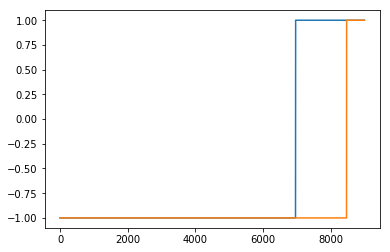

In [1000]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.sort(T_test))
plt.plot(np.sort(d6))

Text(0,0.5,'Y calculated')

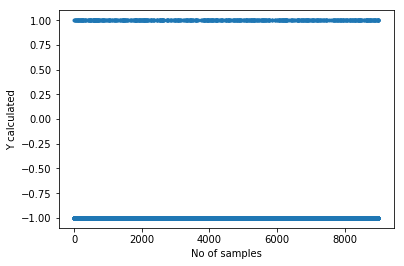

In [1001]:
from copy import deepcopy as copy 
xnew = copy(X_test)
xnew = np.hstack((np.ones((xnew.shape[0], 1)), xnew))
plt.plot(d6, '.')
plt.xlabel("No of samples")
plt.ylabel("Y calculated")

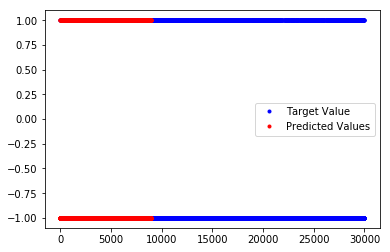

In [1002]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T_test, '.', color='b', label='Target Value')
ax.plot(d6, '.', color='r', label='Predicted Values')
target, predict = ax.get_legend_handles_labels()
ax.legend(target, predict)
plt.show()

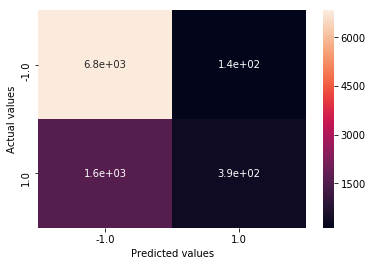

In [1003]:
import seaborn as sb
ax= plt.subplot()
sb.heatmap(cfl, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted values');
ax.set_ylabel('Actual values'); 

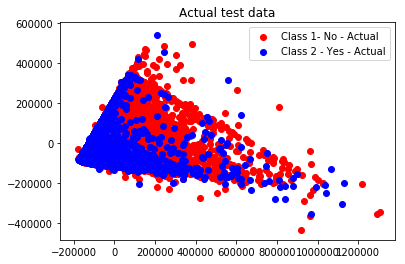

In [1004]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(T_test==-1)
t = np.array(T_test==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Actual', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Actual', c='blue')
plt.title('Actual test data')
plt.legend()

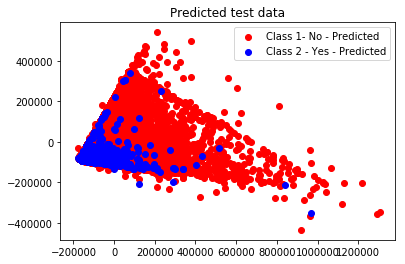

In [1005]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(d6==-1)
t = np.array(d6==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Predicted', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Predicted', c='blue')
plt.title('Predicted test data')
plt.legend()

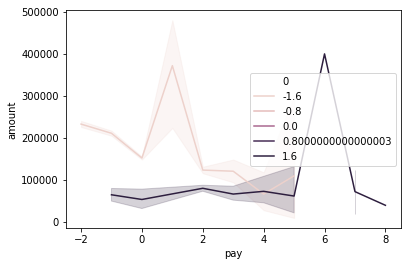

In [1006]:
new_df = pd.DataFrame(d6)
new_df['amount'] = X_test['LIMIT_BAL'].values
new_df['pay'] = X_test['PAY_2'].values
sb.lineplot(x="pay", y="amount", data=new_df, hue=0)

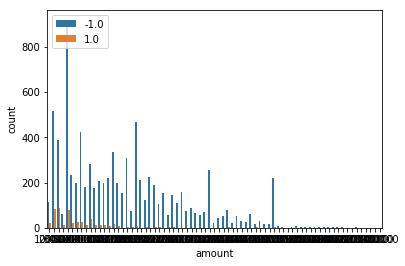

In [1007]:
sb.countplot(x="amount", hue=0, data=new_df)

# Logistic Regression

#### Training the Algorithm 

To train my algorithm I have used chosen an alpha value of 0.001 and my algorithm runs for a maximum iterations of 10. I am passing the alpha value and the number of iterations as input to the algorithm. I am using 70% of my data as train and 30 % of the data as test.

In [1097]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

In [1098]:
logst = LogisticRegression(0.001,10)
logst.train(X_tr, T_tr)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [1 0]
 [1 0]]


#### Using the Algorithm

In [1099]:
ypred = logst.use(X_test)
ypred = np.argmax(ypred, 1)
sam_df = pd.DataFrame(ypred)
sam_df[0] = sam_df[0].replace({0: -1, 1: 1})
ypred_new = np.array(sam_df)

#### Accuracy on the Train Data

In [1100]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

In [1101]:
ypred_train = logst.use(X_tr)
ypred_train = np.argmax(ypred_train, 1)
sampre_df = pd.DataFrame(ypred_train)
sampre_df[0] = sampre_df[0].replace({0: -1, 1: 1})
ypred_new_train = np.array(sampre_df)

In [1102]:
from sklearn.metrics import confusion_matrix
logr=confusion_matrix(T_tr, ypred_new_train)
logr

array([[12271,  4130],
       [ 2035,  2564]], dtype=int64)

In [1103]:
print('Accuracy value:', acc(logr))
print('F1 score :', f1_score(T_tr, ypred_new_train))

Accuracy value: 0.7064285714285714
F1 score : 0.45408660232002124


#### Accuracy on the test data

#### Confusion Matrix

In [1104]:
from sklearn.metrics import confusion_matrix
logreg=confusion_matrix(T_test, ypred_new)
logreg

array([[5220, 1743],
       [ 909, 1128]], dtype=int64)

#### Accuracy & F1

In [1105]:
print('Accuracy value:', acc(logreg))
print('F1 score :', f1_score(T_test, ypred_new))

Accuracy value: 0.7053333333333334
F1 score : 0.4596577017114915


#### Precision

In [1106]:
print('Precision value:', precision(logreg))

Precision value: 0.5537555228276878


#### Recall

In [1107]:
print('Recall value:', recall(logreg))

Recall value: 0.3928944618599791


#### Specificity

In [1108]:
print('Specificity value:', specificity(logreg))

Specificity value: 0.8516886930983847


#### ROC AUC Curve

In [1109]:
roc_auc_score(T_test, ypred_new)

0.6517161931243135

### Summary of Evaluation Metrics

Confusion Matrix = 	array([[5220,    1743],[909,    1128]], dtype=int64)

Accuracy : 0.705

Precision : 0.5537

Recall : 0.392

Specificity : 0.8516

F1 Score : 0.459

ROC : 0.6517



### Test and Train data Accuracy

The train data has an accuracy of: 0.706

The test data has an accuracy of : 0.7053


As the train and test data have similar accuracy this model is not overfitting

# Plots for the Logistic Regression Classification Results

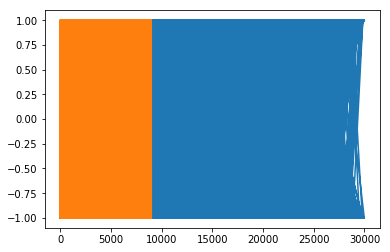

In [1039]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot((T_test))
plt.plot((ypred_new))

Text(0,0.5,'Y calculated')

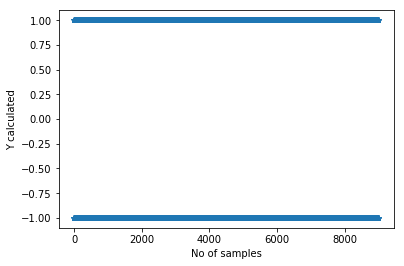

In [1040]:
from copy import deepcopy as copy 
xnew = copy(X_test)
xnew = np.hstack((np.ones((xnew.shape[0], 1)), xnew))
plt.plot(ypred_new, '*')
plt.xlabel("No of samples")
plt.ylabel("Y calculated")

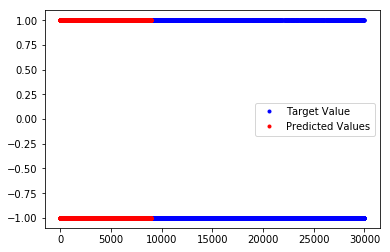

In [1041]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T_test, '.', color='b', label='Target Value')
ax.plot(ypred_new,'.', color='r', label='Predicted Values')
target, predict = ax.get_legend_handles_labels()
ax.legend(target, predict)
plt.show()

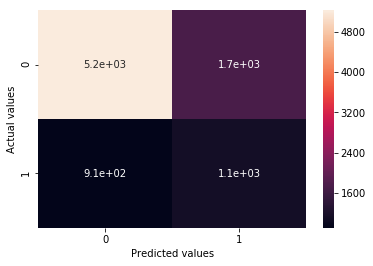

In [1042]:
import seaborn as sb
ax= plt.subplot()
sb.heatmap(logreg, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted values');
ax.set_ylabel('Actual values'); 

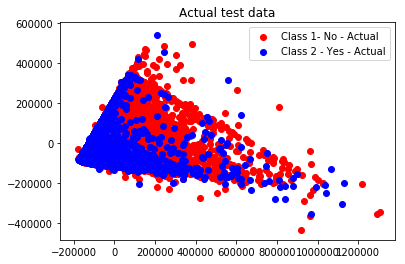

In [1043]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(T_test==-1)
t = np.array(T_test==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Actual', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Actual', c='blue')
plt.title('Actual test data')
plt.legend()

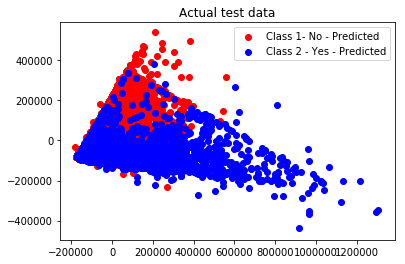

In [1044]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
trans = pd.DataFrame(pca.fit_transform(X_test))
f = np.array(ypred_new==-1)
t = np.array(ypred_new==1)
plt.scatter(trans[f][0], trans[f][1], label='Class 1- No - Predicted', c='red')
plt.scatter(trans[t][0], trans[t][1], label='Class 2 - Yes - Predicted', c='blue')
plt.title('Actual test data')
plt.legend()

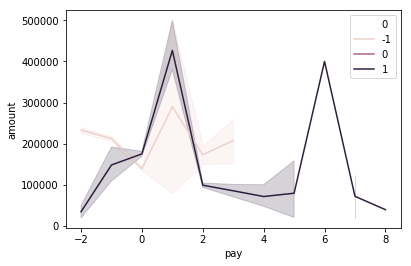

In [1045]:
new_df = pd.DataFrame(ypred_new)
new_df['amount'] = X_test['LIMIT_BAL'].values
new_df['pay'] = X_test['PAY_2'].values
sb.lineplot(x="pay", y="amount", data=new_df, hue=0)

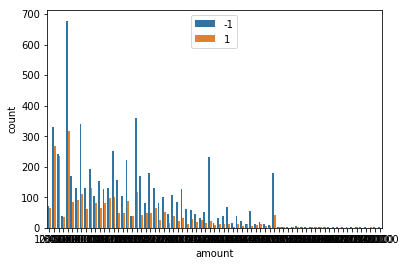

In [1046]:
sb.countplot(x="amount", hue=0, data=new_df)

# Comparison of the Classification Models


Pocket Algorithm:

This algorithm is a good linear regression model for identifying the classes.My data is suitable for this algorithm and it had an accuracy of almost 0.4 on my data. This algorithm will be betetr suitable if the data set is small so that we can run many number of iterations on that dataset and can obtain a good prediction of weights.For larger algorithm there is lot of computational overhead in this model and it requires so much time or days to just train the algorithm and also we just minimize the number of iterations which inturn minimizes the chance of giving the effetive weights.

QDA Algorithm:

The QDA algorithm for my data set was least performed. It was not able to identify the appropriate classes and the accuracy rate for my dataset was very low to 0.2. The scattered graphs that are plotted above indicates that there is no classification related to the red markers and only the blue markers are more highlighted in the graph.So it is very clear that this algorithm did not prove to be effecient on my dataset. I have also tried to plot the features as well as the target value to show how much each feature is affecting the target data. The graph showing the amount and the y clearly shows that this model is overfitting

LDA algorithm:

The LDA algorithm for my dataset was the best option. The accuracy was high and was around 0.8 and the scattered plots above clearly tells us that the algorithm was able to properly classify most of the data. In the scattered plots the blue markers and red markers are properly plotted and is very much similar to the actual graph plotted. In the graph of features vs target data also the pattern shows a good amount of influence of the column 'amount' in the target data. The sorted plots clearly show the pattern in which the data is classified.

Logistic Regression:

The Logistic Regression algorithm appiled on my dataset gave good results.Te accuracy was high and it was around 0.7 and the scattered plots, sorted plots show how the data is classified and give a good comparison of the actual and the predicted data. The dependency of the feature variables that are helpful in predicting the target data is also shown in the graphs.

Finally I conclude that for my dataset the Logistic Regression and the LDA algorithms seemed to be very effective and with less computational cost consuming less amount of time to train the data than the other algorithms and the scattered plots and other plots used above serve as a proof for this




# Conclusions

Based on the above classification techniques and analysis  noticed that for my data set Logistic Regression, LDA Algorithm were betetr than the QDA and Pocket Algorithm methods and they had good accuracies while plotting the data. I feel that pocket and logistic regression ad almost similarity in the computation. The Pocket algorithm takes lot of time to train the data so we can either minimize the number of iterations or we can minimize the size of the data we wish to train the algorithm. QDA and LDA are almost similar and the computation is made by computing the discriminant value. The challenging task in this assignment was to claassify the data in the train methods of QDA and LDA and managing the shapes of the data in all the algorithms. It would have been better if there would be some other ways of normalizations to implement in the calculation as for few of the algorithms the values are very small and almost rounded off to zero


# References

http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron

https://scikit-plot.readthedocs.io/en/stable/Quickstart.html

http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb

http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb

https://www.oreilly.com/library/view/python-cookbook/0596001673/ch01s15.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

https://codesachin.wordpress.com/2015/08/25/linear-and-quadratic-discriminant-analysis-for-ml-statistics-newbies/

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)